# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Libraries

In [1]:
import os

import pandas as pd

from feature_engineering import DataManager
from feature_engineering.features import TipHistory, ReorderedRatio, DynamicFeatureTest1, DynamicFeatureTest2, \
    OrderSize, ModeDepartment, PrevTippedProductsRatio, CustomerLifetime, PrevOrderTipped, OrderFrequency, \
    SimOrdersTipRatio, ProductTipRate, DepartmentTipRate, AisleTipRate, OrderExcessLikability, AvgSizePrevOrders, \
    MeanOrderedRate, LastTipSequence, RelDaysSinceTip, DaysSinceTip

### Data Initialization

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [3]:
#features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'tip_history',
#          'reordered_ratio', 'order_size', 'mode_dept', 'prev_tipped_products_ratio', 'avg_size_prev_orders']

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()  # TODO: First order NaN
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
mode_dept = ModeDepartment()  # TODO: Probably remove (maybe exchange with other order content related feature)
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()  # TODO: First order NaN
rel_days_since_tip = RelDaysSinceTip()  # TODO: NaN handling
days_since_tip = DaysSinceTip()  # TODO: NaN handling

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()  # TODO: Maybe remove weighting or add additional feature without weoghting

# Tom
order_excess_likability = OrderExcessLikability()  # TODO
avg_size_prev_orders = AvgSizePrevOrders()  # TODO: Prozentuale Abweichung (positiv wenn größer, negativ wenn kleiner) 

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [4]:
# Static Features
# data_manager.register_feature(tip_history)
# data_manager.register_feature(reordered_rate)
# data_manager.register_feature(order_size)
# data_manager.register_feature(customer_lifetime)
# data_manager.register_feature(prev_order_tipped)
# data_manager.register_feature(prev_tipped_products_ratio)

# data_manager.register_feature(mode_dept)
# data_manager.register_feature(order_frequency)
# data_manager.register_feature(sim_orders_tip_ratio)
# data_manager.register_feature(order_excess_likability)
# data_manager.register_feature(avg_size_prev_orders)
# data_manager.register_feature(mean_ordered_rate)
# data_manager.register_feature(last_tip_sequence)
# data_manager.register_feature(rel_days_since_tip)
# data_manager.register_feature(days_since_tip)

# # Dynamic Features
# data_manager.register_feature(dynamic_feature_test_1)
# data_manager.register_feature(dynamic_feature_test_2)
# data_manager.register_feature(product_tip_rate)
# data_manager.register_feature(department_tip_rate)
# data_manager.register_feature(aisle_tip_rate)

In [5]:
# data_manager.compute_features()

In [6]:
# data_manager.get_orders_tip().head(100)

In [7]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
# data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [9]:
# data_manager.get_orders_tip().head(100)

In [10]:
# test = data_manager.get_orders_tip()

In [11]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [12]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [13]:
# data_manager.set_subset(order_ids)

In [14]:
# data_manager.get_orders_tip().head(25)

In [15]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [16]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [17]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [36]:
from analysis import Temporary, OrderTime, OrderContents

In [37]:
order_time = OrderTime(data_manager)
order_contents = OrderContents(data_manager)
days_since_prior_order = Temporary(data_manager)
# Frequency of items with tip probability > 0.9, 0.8, 0.7, 0.6, 0.5 ... 0.1 
# Group into percentiles and average tip probability
# Plot bar chart with tip probability and mean tip probability (limit to top 10?)

# TODO:
# - Cluster Heat Map
# - Decide on departments grouping
# - Product/Department/Aisle Tip Rate
# - Sort products by tip rate in graph

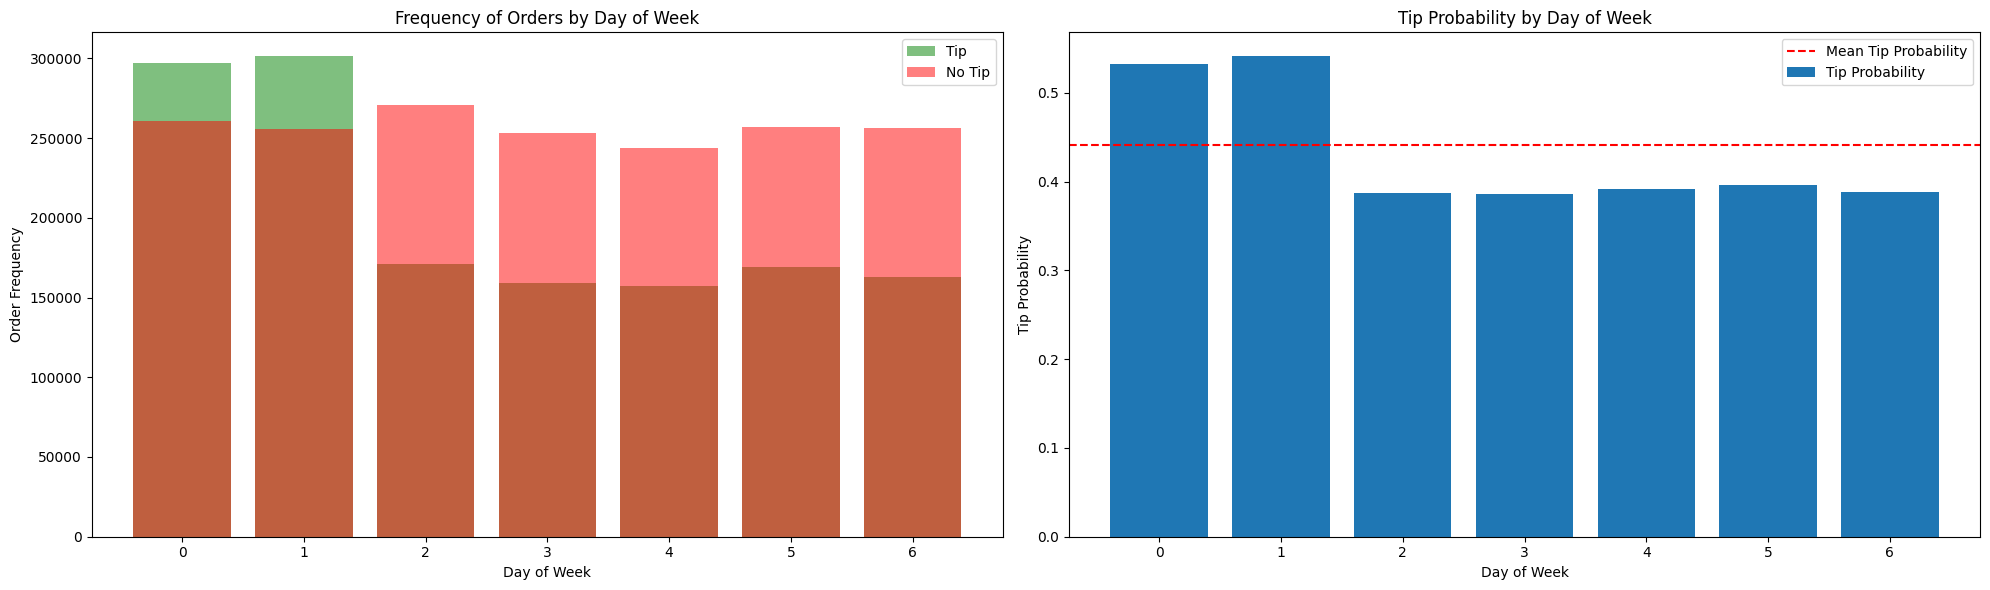

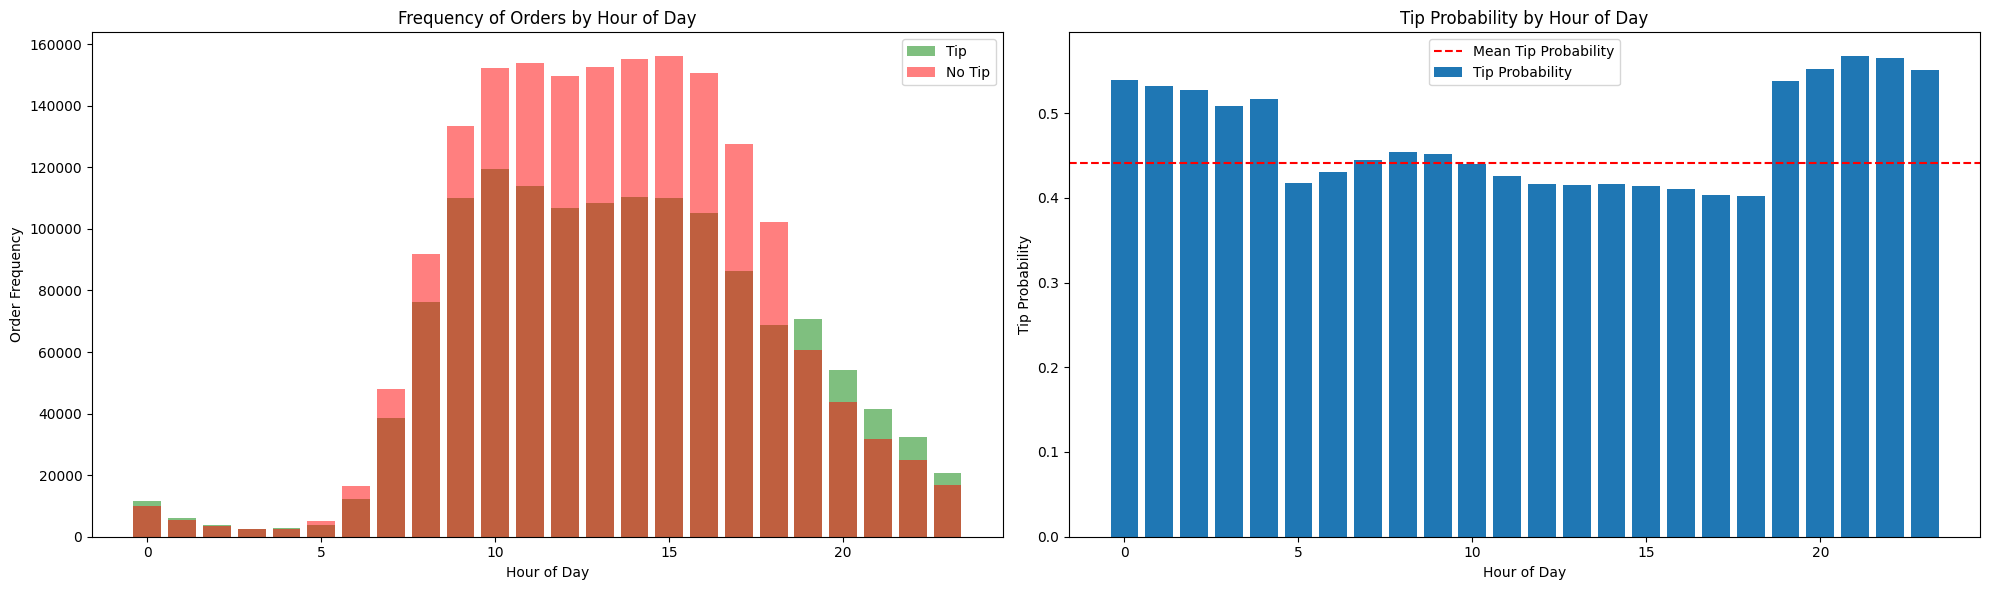

In [38]:
order_time.execute_analysis()

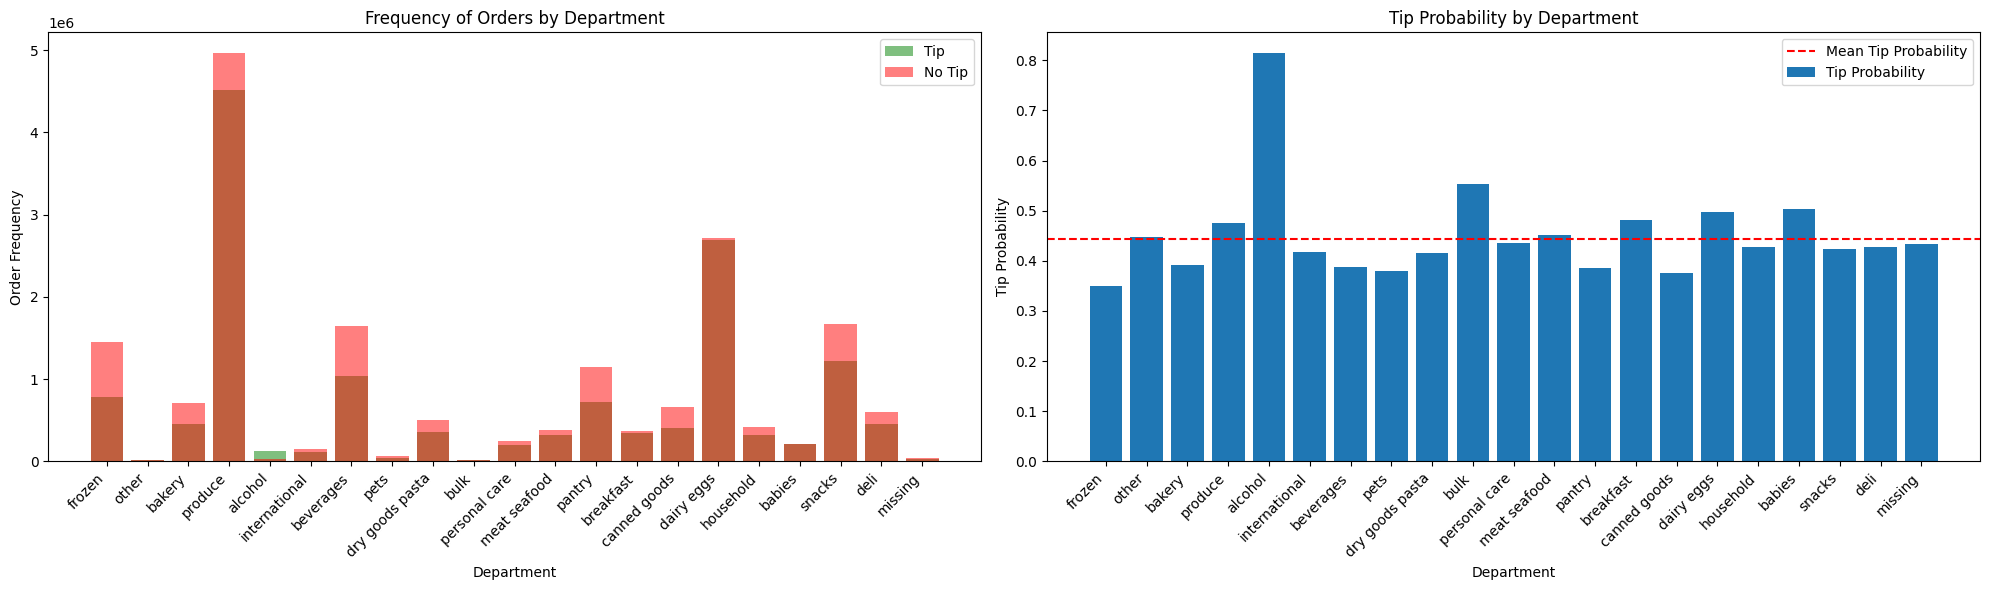

In [39]:
order_contents.execute_analysis()

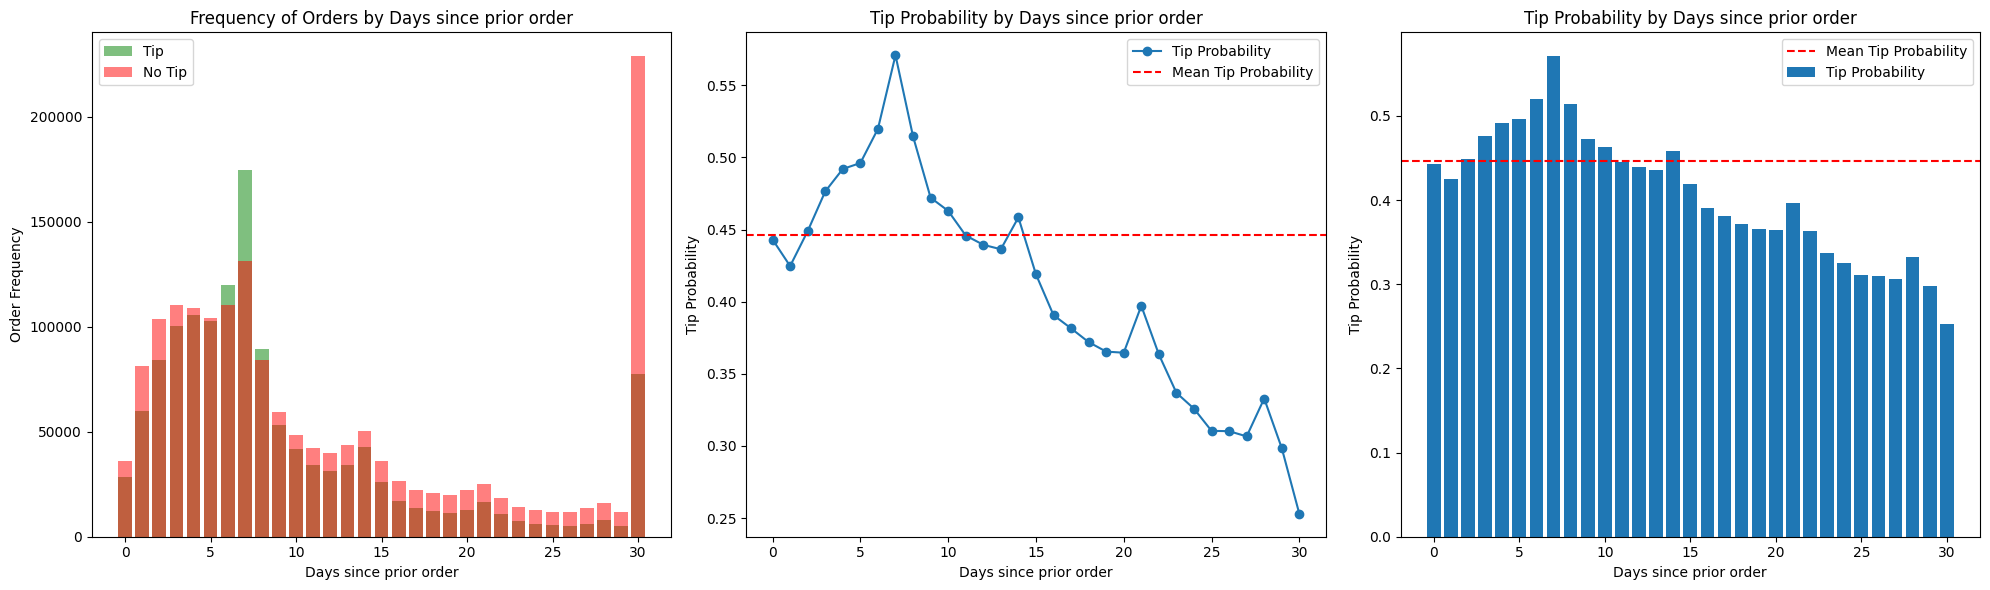

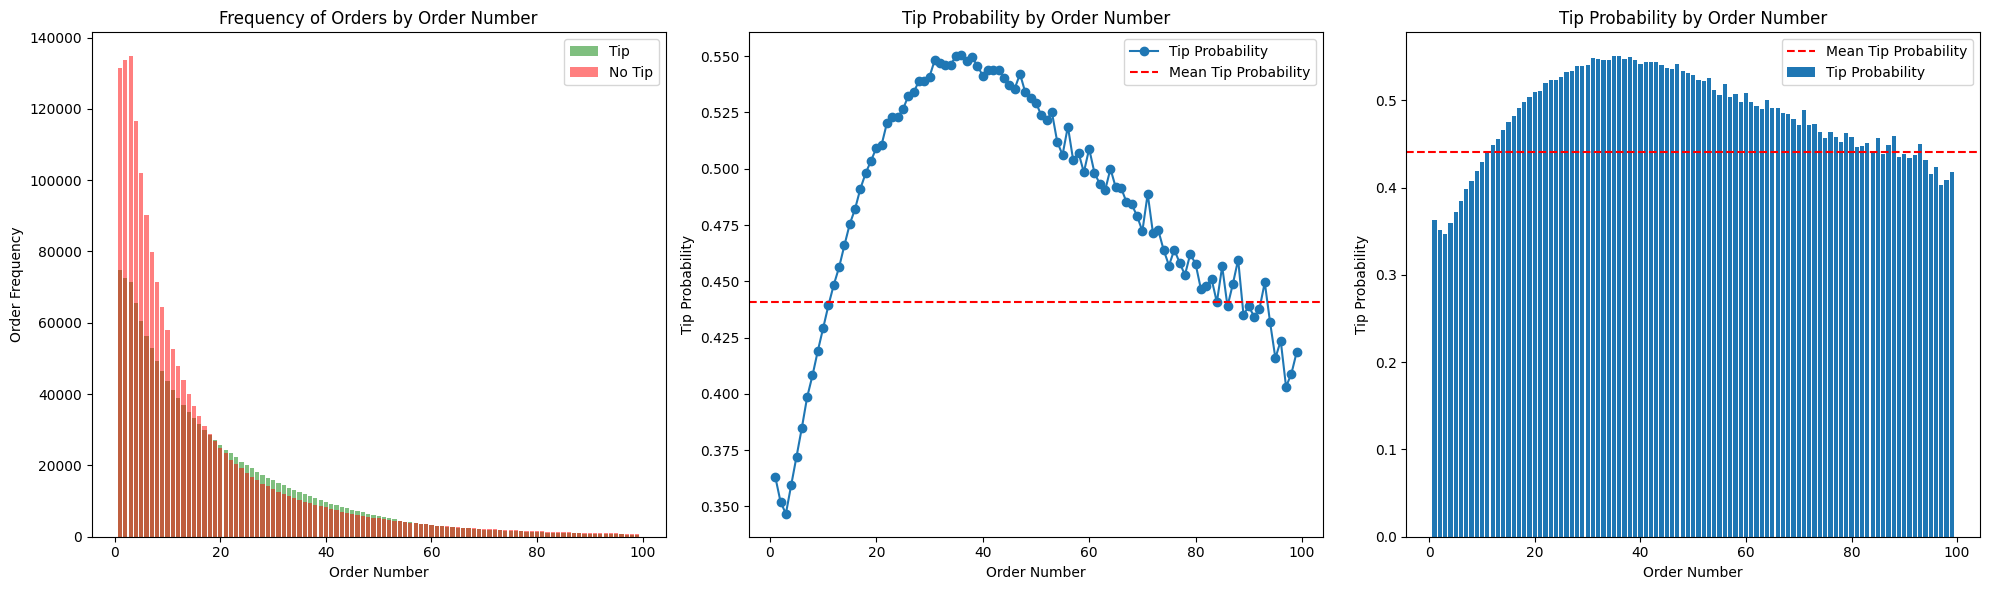

In [40]:
days_since_prior_order.execute_analysis()

In [23]:
a = days_since_prior_order

In [24]:

# dow_hod_tip = a.orders_tip[['order_dow', 'order_hour_of_day', 'tip']]
# 
# cross_tab_dow = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True)
# cross_tab_dow

In [25]:
# cross_tab_dow_normalized = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True,
#                                        normalize='index')
# cross_tab_dow_normalized

In [26]:
# cross_tab_hod = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True)
# cross_tab_hod

In [27]:
# cross_tab_hod_normalized = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True,
#                                        normalize='index')
# cross_tab_hod_normalized

In [28]:
# prod_aisle_dep_tip = a.orders_joined[['product_id', 'aisle_id', 'department_id', 'tip']]
# department_mapping = a.departments.set_index('department_id')['department']

In [29]:
# cross_tab_department = pd.crosstab(index=prod_aisle_dep_tip['department_id'],
#                                    columns=prod_aisle_dep_tip['tip'],
#                                    margins=True).rename(index=department_mapping)
# cross_tab_department

In [30]:
# cross_tab_department_normalized = pd.crosstab(index=prod_aisle_dep_tip['department_id'],
#                                               columns=prod_aisle_dep_tip['tip'],
#                                               margins=True,
#                                               normalize='index').rename(index=department_mapping)
# cross_tab_department_normalized

In [31]:
dspo_tip = a.orders_tip[['days_since_prior_order', 'tip']]

cross_tab_dspo = pd.crosstab(index=dspo_tip['days_since_prior_order'], columns=dspo_tip['tip'],
                             margins=True)
cross_tab_dspo

tip,0.0,1.0,All
days_since_prior_order,,,
0.0,35885,28551,64436
1.0,81123,59888,141011
2.0,103447,84276,187723
3.0,110293,100372,210665
4.0,108954,105534,214488
5.0,104145,102546,206691
6.0,110560,119685,230245
7.0,131396,174785,306181
8.0,84098,89161,173259


In [32]:
cross_tab_dspo_normalized = pd.crosstab(index=dspo_tip['days_since_prior_order'], columns=dspo_tip['tip'],
                                        margins=True,
                                        normalize='index')
cross_tab_dspo_normalized

tip,0.0,1.0
days_since_prior_order,,
0.0,0.556909,0.443091
1.0,0.575296,0.424704
2.0,0.551062,0.448938
3.0,0.523547,0.476453
4.0,0.507972,0.492028
5.0,0.503868,0.496132
6.0,0.480184,0.519816
7.0,0.429145,0.570855
8.0,0.485389,0.514611


In [33]:
# # Assume DataFrames: order_products, products, departments are already available
# order_summary = a.orders_joined.groupby('product_id').size().reset_index(name='count').merge(products, on='product_id')
# department_summary = order_summary.groupby('department_id').agg(total_count=('count', 'sum')).reset_index()
# 
# # Merge with department names for more meaningful labels
# department_summary = department_summary.merge(departments, on='department_id')


In [34]:
# import matplotlib.pyplot as plt
# import squarify  # Treemap plotting library
# 
# # Assuming department_summary has been created and prepared as previously described
# sizes = department_summary['total_count'].astype(float)
# sizes = 100. * sizes / sizes.max()  # Normalize sizes for better visualization
# 
# labels = department_summary['department'].apply(lambda x: x.split()[0])  # Use only the first word if the name is long
# colors = plt.cm.viridis(sizes / max(sizes))  # Color mapping from sizes
# 
# # Increase figure size for better visualization
# plt.figure(figsize=(20, 12))  # Adjusted from (12, 8) to (20, 12)
# 
# # Adding edgecolor parameter for borders between the squares
# squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.9, edgecolor='white')
# plt.title('Distribution of Orders by Department')
# plt.axis('off')  # Disable the axes for a clean look
# plt.show()

### Data Preparation

In [35]:
# TODO:
# - Remove first orders of each user
# - Encode discrete features (dow, hour of day)

### Model Training & Evaluation